## Assignment 2 Regression
### CS450 Fall 2022

We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

# **Student Name: Dante Viscuso**


## Problem 1 (20 points)
### Simple Linear Regression
The purpose of this exercise is to implement a simple linear regression from scratch.
Do not use a library to implement it.
You will generate synthetic data using the linear equation y = 50x + 22
The synthetic data will have some random variation to make the problem interesting. 
* Grading Criteria: The result of your regression should round to the orginal equation. It is not expected to be perfect.
* I have a sample notebook that I will be going over in class. That will get you 80% through problem 1

### Part 1 - Generate Data
1. Randomly select 20 X values between 0 and 100. Use a uniform distribution.
2. Calculate Y values using 50x + 22 + RANDOM_VARIATION
        2.1 The random variation is because we don't want it to be perfect
        2.2 Use a normal distribution with values between -1 and 1 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def generate_values(num_values, double_y):
  x_values, y_values = [], []
  for i in range(num_values):
    x = np.random.uniform(0,100)
    x_values.append(x)
    y = 50 * x + 22 + np.random.uniform(-1,1)
    y_values.append(y)

  if double_y:
    y_values[9] *= 2
  return x_values, y_values

In [ ]:
# Generate Data
x_vals, y_vals = generate_values(20,False)

### Part 2 - Calculate Regression
Now that you have the data, calcualate the regression. Show your value for slope and intercept. Do not use an libraries to do it for you.
<BR>You have some random variance, so you probably won't get exactly y=50x+22 , but it should round to it.

In [ ]:
def calculate_coefficents(x_vals,y_vals):
  # Calc the Mean
  mean_x = sum(x_vals) / float(len(x_vals))
  mean_y = sum(y_vals) / float(len(y_vals))

  # Calc the variance
  var_x = sum([(x-mean_x)**2 for x in x_vals])
  var_y = sum([(y-mean_y)**2 for y in y_vals])

  # Calc the covariance
  co_var = 0.0
  for i in range(len(x_vals)):
    co_var += (x_vals[i] - mean_x) * (y_vals[i] - mean_y)

  # Calc the Coefficients
  b1 = co_var / var_x
  b0 = mean_y - b1 * mean_x

  return b0, b1

In [ ]:
intercept, slope =  calculate_coefficents(x_vals,y_vals)
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")

Slope:50.00157694892192
Intercept:21.85769504396103


### Part 3 - Visualization
Create a visualization
* Include a scatter plot of the data points
* Include the real line for y = 50x +22 in blue
* Include the regression line in red (they may overlap, that is ok)

In [ ]:
def create_plot(x_vals, y_vals):
  x = np.linspace(0,100,100)
  intercept, slope =  calculate_coefficents(x_vals,y_vals)
  y = intercept + slope * x
  z = 22 + 50 * x

  label = f"Linear Regression: {round(slope, 2)}x + {round(intercept, 2)}" if intercept > 0 else f"Linear Regression: {round(slope, 2)}x - {round(intercept, 2) * -1}"
  plt.plot(x, y, '-r', label=label)
  plt.plot(x, z, '-b', label='Actual: 50x + 22')

  plt.scatter(x_vals, y_vals, color='black')

  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()

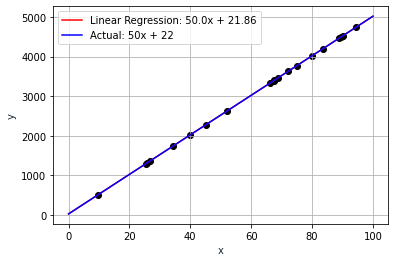

In [ ]:
create_plot(x_vals, y_vals)

### Part 4 - Create an outlier
Double the Y value for your 10th data point.
Run your regression function again and observe how the equation to the line changes.

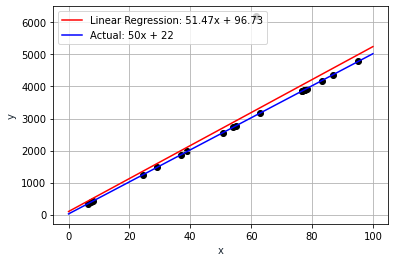

In [ ]:
x_vals, y_vals = generate_values(20,True)
create_plot(x_vals, y_vals)

## Problem 2 (10 points)
### Multiple Linear Regresion 
You have already demonstrate that you can implement a simple linear regression. Now we will look at a dataset that use multiple variables.
I am using data from https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv

Predict the charges based on the independent variables?
Are all the independent variables really independent? What would you do if they weren't?

I slightly modified the data to add a bit more fun.
If you go to the Kaggle site and click the Code tab, you can see sample notebooks that can help you with this problem. However, remember that I changed some of the data so it is not an exact match.

I placed the modified datafile on github and included code to pull the data into a Panda dataframe.

Train your model on 90% of the data and use the other 10% for validation. How close are the predictions? Explain how you evaluate closeness.

Explain your process for cleaning the data.

Try a few different models that do not use all the independent variables. Do some of them perform better than others?  There are techniques to determine the best subset of features to use, but they are out of scope for this class.



In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
dfInsurance = pd.read_csv("https://raw.githubusercontent.com/willwilson-sdsu/CS550/main/insurance_data_cs450_fa2022.csv")

#### Data Exploration
* We don't go into depth on this in this class, so you do not need to provide an in depth exporatory data analysis. You only need to look into the data enough to determine what cleaning and transformations you need to do before creating your model

In [ ]:
dfInsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


In [ ]:
dfInsurance.isnull().sum()

age         0
sex         0
bmi         1
children    0
smoker      1
region      0
charges     0
dtype: int64

In [ ]:
dfInsurance.nunique()

age           49
sex            2
bmi          549
children       6
smoker         2
region         5
charges     1336
dtype: int64

In [ ]:
dfInsurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges      object
dtype: object

In [ ]:
dfInsurance['charges'].value_counts()

1639.5631      2
unknown        2
16884.924      1
2117.33885     1
2221.56445     1
              ..
7345.084       1
26109.32905    1
28287.89766    1
1149.3959      1
29141.3603     1
Name: charges, Length: 1336, dtype: int64

# Male or Female


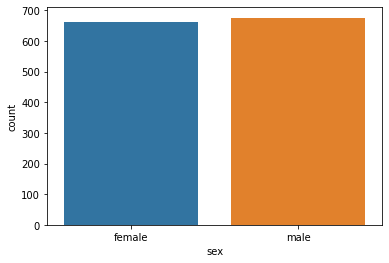

In [ ]:
sns.countplot(x = dfInsurance['sex']);

# Smoker or Non-Smoker

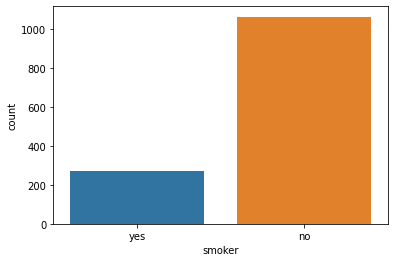

In [ ]:
sns.countplot(x = dfInsurance['smoker']);

# Number of Children

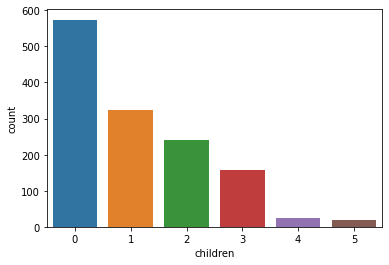

In [ ]:
sns.countplot( x = dfInsurance['children']);

# Geo Region

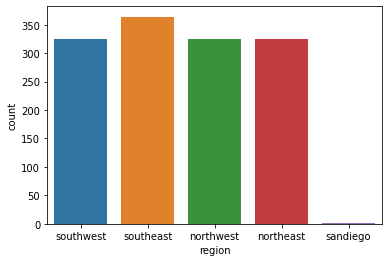

In [ ]:
sns.countplot(x = dfInsurance['region']);

# Age

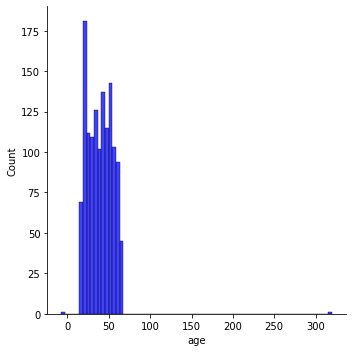

In [ ]:
sns.displot(dfInsurance['age'], kde=False, color="blue");

# Body Mass Index

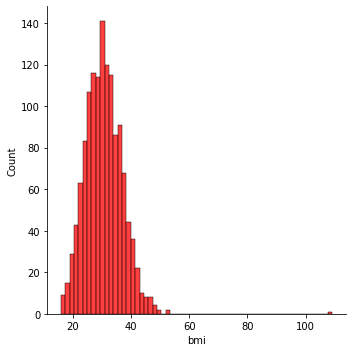

In [ ]:
sns.displot(dfInsurance['bmi'], kde=False, color="red");

In [ ]:
dfInsurance.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.392377,16.06012,-8.0,26.25,39.0,51.0,320.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1337.0,NaN,NaN,NaN,30.722517,6.463766,15.96,26.315,30.4,34.7,109.0
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1337,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,5,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,1336,1639.5631,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### What did you determine from your exploration?
__Findings__
*   Null values in: Smoker, BMI
*   Charges recognized as a string
*  Charges contains bad values, i.e "unkown" that cant be parsed directly to float
* Region contains one random 'sandiego'
* For linear regressions, convert categories to numbers
* Major Outliers in Age and BMI.
* Charges might need to be scaled with such a high std 

### Data Cleaning

# Cleaning Charges

count    1338.000000
mean        9.099242
std         0.917856
min         7.022756
25%         8.465167
50%         9.147268
75%         9.713971
max        11.063045
Name: charges, dtype: float64

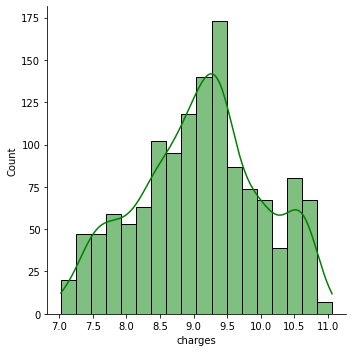

In [ ]:
# Convert strings to float and fill unparsables with null values
dfInsurance['charges'] = pd.to_numeric(dfInsurance['charges'], errors='coerce')

# Fill those null values with the mean of the series
dfInsurance['charges'].fillna(dfInsurance['charges'].mean(), inplace = True)

# OPTIONAL - Normlize data with a log transformation
charge_log = np.log(dfInsurance['charges'])
dfInsurance['charges'] = charge_log
sns.displot(dfInsurance['charges'], kde=True, color="green")

# Review
dfInsurance['charges'].describe()

# Cleaning BMI

count    1337.000000
mean       30.663970
std         6.098401
min        15.960000
25%        26.315000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

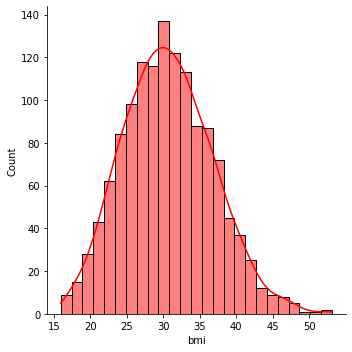

In [ ]:
# Fill the null value with the mean of the series
dfInsurance['bmi'].fillna(dfInsurance['bmi'].mean(), inplace = True)

# Remove Outliers
dfInsurance = dfInsurance[dfInsurance['bmi'] < 100]

# Review
sns.displot(dfInsurance['bmi'], kde=True, color="red")
dfInsurance['bmi'].describe()

# Cleaning Smoker

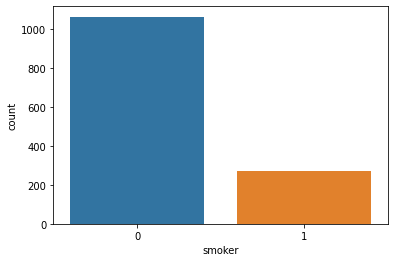

In [ ]:
# Fill the null value with the most common value of the series
mode = dfInsurance['smoker'].mode().values[0]
dfInsurance['smoker'].fillna(value = mode, inplace = True)

# Convert categoricals variables to numbers
dfInsurance['smoker'].replace(['no', 'yes'], [0,1], inplace = True)

# Review
sns.countplot(x = dfInsurance['smoker']);

# Cleaning Region

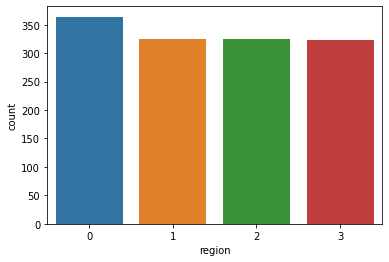

In [ ]:
# Drop San Diego
dfInsurance.drop(dfInsurance[dfInsurance['region'] == 'sandiego'].index, inplace = True)

# Convert categoricals variables to numbers
dfInsurance['region'].replace(['southeast', 'northwest', 'southwest', 'northeast'], [0,1,2,3], inplace = True)

# Review
sns.countplot(x = dfInsurance['region']);

# Cleaning Sex

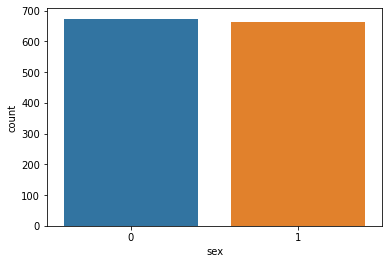

In [ ]:
# Turned categories to numbers
dfInsurance['sex'].replace(['male', 'female'], [0,1], inplace = True)

# Reiview
sns.countplot(x = dfInsurance['sex']);

# Cleaning Age

count    1334.000000
mean       39.211394
std        14.049008
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

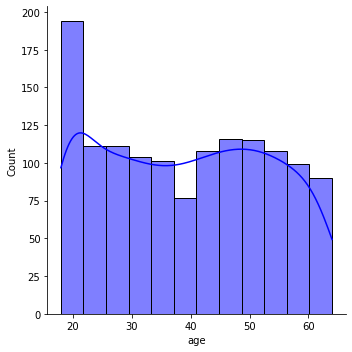

In [ ]:
# Remove Outlier
dfInsurance = dfInsurance[(dfInsurance['age'] < 100) & (dfInsurance['age'] > 0)]

# Review
sns.displot(dfInsurance['age'], kde=True, color="blue")
dfInsurance['age'].describe()

#### Model Generation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Define X and Y
x = dfInsurance.drop(['charges'], axis =1).values
y = dfInsurance['charges'].values

# Split Data in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=15)

# Train model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Model Analysis

Explain your model and how you could improve it:

My model utulized all the values at my disposal to generated the predicted amount of charges. I also took the liberty of running a log transformation on charges as others it was no where near a normal distribution. On top of that as I mentioned before, I used all the independent variables, including the categroicals ones which I turned into numbers to represent their group. After creating the model, depending on the train/test split the R^2 score can range anywhere from around 70-90 which is not too bad but surely can be imporved upon. I'll discuss future ideas below

# R^2 Score

In [ ]:
# Predict the test results
Y_predictions = model.predict(x_test)
r2_score(y_test, Y_predictions)

0.8576019349092344

# Plotting True vs Predcited Values of Charges

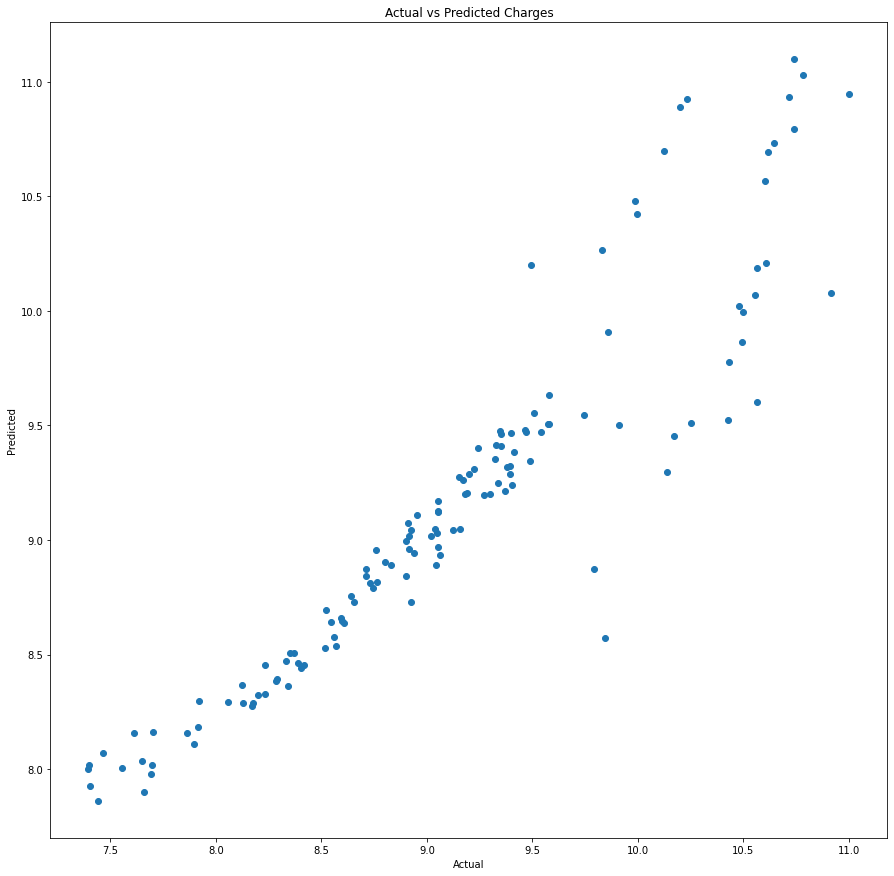

In [ ]:
# Plot the results
plt.figure(figsize=(15,15))
plt.scatter(y_test,Y_predictions)

plt.xlabel('Actual')
plt.ylabel('Predicted')

_ = plt.title('Actual vs Predicted Charges')

# Further EDA

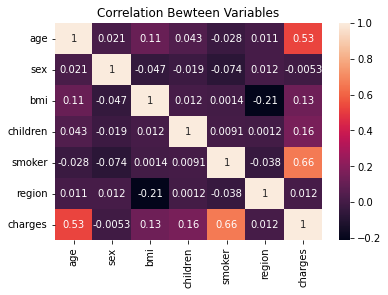

In [ ]:
ax = sns.heatmap(dfInsurance.corr(), annot=True)
ax.set_title('Correlation Bewteen Variables');

Age and Smoker seem to be correlated with charges so we can explore them a bit more to find the best way to use these independent variables for a possible future model

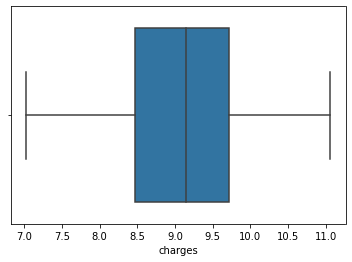

In [ ]:
_ = sns.boxplot(x = dfInsurance["charges"])

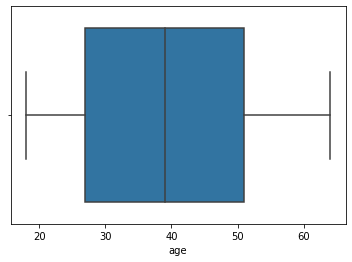

In [ ]:
_ = sns.boxplot(x = dfInsurance["age"])

No major outliers

In [ ]:
dfInsurance.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
age,1334.0,39.211394,14.049008,18.000000,27.000000,39.000000,51.000000,64.000000
sex,1334.0,0.495502,0.500167,0.000000,0.000000,0.000000,1.000000,1.000000
bmi,1334.0,30.669338,6.099395,15.960000,26.315000,30.400000,34.700000,53.130000
children,1334.0,1.095952,1.206297,0.000000,0.000000,1.000000,2.000000,5.000000
smoker,1334.0,0.203898,0.403045,0.000000,0.000000,0.000000,0.000000,1.000000
region,1334.0,1.452024,1.130107,0.000000,0.000000,1.000000,2.000000,3.000000
charges,1334.0,9.099194,0.917631,7.022756,8.465167,9.147268,9.713971,11.063045


# Creating new model

In [ ]:
# Define X and Y
x = dfInsurance.drop(['charges', 'sex', 'age', 'children', 'region'], axis =1).values
y = dfInsurance['charges'].values

# Split Data in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=1)

# Train model
model_2 = LinearRegression()
model_2.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predict the test results
Y_predictions = model_2.predict(x_test)
r2_score(y_test, Y_predictions)

0.3898581293495619

Text(0.5, 1.0, 'Actual vs Predicted Charges')

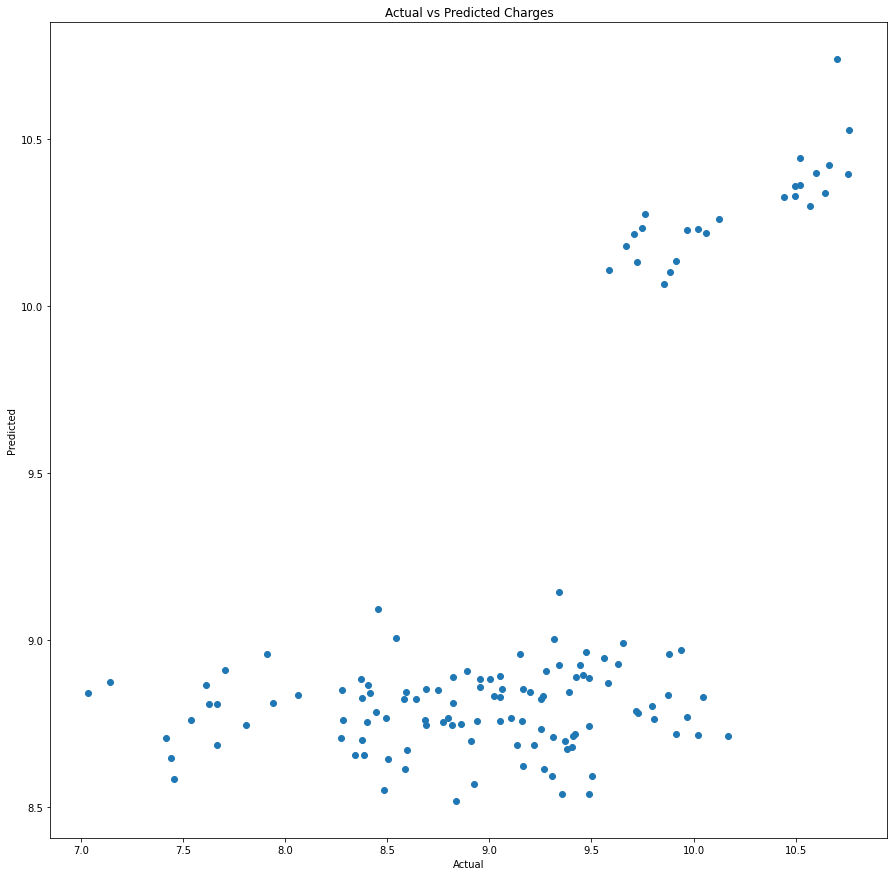

In [ ]:
# Plot the results
plt.figure(figsize=(15,15))
plt.scatter(y_test,Y_predictions)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs Predicted Charges')

# Summary
The new model is much worse than the one that uses all the variables, this could be for a number of reaons, perhaps I needed to apply the log transformation on all the other independent variables, or even create new features and get more complicated with the model generation but I believe that this is out of scope of this class.